# CS541: Applied Machine Learning, Fall 2024, Lab 10

Lab 10 is an exercise that explores Reinforcement Learning. In reinforcement learning, an agent learns to make decisions by interacting with an environment, it is used in robotics and other decision-making settings. Reinforcement learning works by having an agent interact with an environment and through trial-and-error is rewarded or punished based on certain actions. Based on the modeling on the environment the action can learn from it's environment but sometimes this may need to be adjusted to help the agent better learn.

**Lab Grading**

Labs are hands-on exercises designed to provide guided experience in key concepts through this class.  You are graded based on in-lab participation (not correctness), and are not required to submit your lab if you attend in-person.  *Make sure you fill out the attendence form before leaving class*.

For students who miss a lab, you can submit a make-up lab on gradescope by the Friday directly following the lab for partial credit.  Please see the syllabus for the lab grading policy.

Fun references for RL and Q Learning: http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture14.pdf




In [ ]:
!apt update
!apt-get install -y xvfb ffmpeg x11-utils
!pip install gym pyvirtualdisplay PyOpenGL PyOpenGL-accelerate
!pip install xvfbwrapper

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,105 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,605 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-up

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from IPython.display import clear_output
import imageio
import base64
import math
from IPython.display import Image

# Here we will go about implementing the MountainCar example from OpenAI's gym library
https://www.gymlibrary.dev/environments/classic_control/mountain_car/

In [ ]:
import gym
import numpy as np
import imageio

env = gym.make("MountainCar-v0")
state, info = env.reset()
print('len(state)')
print((state))
print(info)

LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 10000

SHOW_EVERY = 200


# Use this to represent the bins for each axis
DISCRETE_OS_SIZE = [18] * len(env.observation_space.high)

# This is calculated by subtracting the (high and lowest values for observation space) and dividing that by the discrete_os_size we defined above
discrete_os_win_size =

# We create the q_table by using the uniform generator from numpy
# We use the low value as -2 and the high value as 0, the size would be the discrete_os_size we defined above plus the action space number
q_table = np.randon.uniform(,,size=( + [env.action_space.n]))

print('q_table.shape')
print(q_table.shape)
def get_discrete_state(state):
    #To discretize the state, we use the (state and subtract it from the lowest observation space value)
    # and we divide this output by the discrete_os_win_size we defined above
    discrete_state =
    return tuple(discrete_state.astype(int))


for episode in range(EPISODES):
    if episode % SHOW_EVERY == 0:
        render = True
    else:
        render = False

    discrete_state = get_discrete_state(env.reset())
    print('discrete_state')
    print(discrete_state)
    frames = []
    done = False
    while not done:
        # Here we get the argmax of the q-table value at the discrete_state
        action =
        new_state, reward, done, _ = env.step(action)
        # Call the discrete_state function we defined above and pass the new_state we obtained
        new_discrete_state =
        if render:
            frames.append(env.render(mode="rgb_array"))

        if not done:
            # Here we get the max of the q-table value at the new_discrete_state
            max_future_q =
            current_q = q_table[discrete_state + (action, )]

            # Here we calculate the new q_value, in this instance we use ((1 - learning rate) multiplied by the current q value)
            # we then add this result to the (learning rate multipled by (reward plus the discount value multipled by the max_future_q))
            new_q =
            q_table[discrete_state + (action, )] = new_q
        elif new_state[0] >= env.goal_position:
            print(f"Congratulation! We reached to the goal! Episode: {episode}")
            q_table[discrete_state + (action, )] = 0

        # We set the discrete state to the new discrete state
        discrete_state =
    if render:
        print(frames[0].shape)
        #We save the result as a gif, which we can view as it is saved in our Google Colab folder
        imageio.mimsave(f'./{episode}.gif', frames, fps=40)

env.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

len(state)
-0.44478637
0.0
env.observation_space.high
[0.6  0.07]
DISCRETE_OS_SIZE
[18, 18]
env.action_space.n
3
Discrete(3)
q_table.shape
(18, 18, 3)
discrete_state
(7, 9)
(400, 600, 3)


/usr/local/lib/python3.10/dist-packages/imageio/plugins/pillow.py:409: DeprecationWarning: The keyword `fps` is no longer supported. Use `duration`(in ms) instead, e.g. `fps=50` == `duration=20` (1000 * 1/50).
  warnings.warn(


discrete_state
(6, 9)
discrete_state
(7, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(7, 9)
discrete_state
(7, 9)
discrete_state
(7, 9)
discrete_state
(6, 9)
discrete_state
(7, 9)
discrete_state
(7, 9)
discrete_state
(6, 9)
discrete_state
(7, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(7, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(7, 9)
discrete_state
(7, 9)
discrete_state
(7, 9)
discrete_state
(7, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(7, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(7, 9)
discrete_state
(7, 9)
discrete_state
(6, 9)
discrete_state
(7, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_state
(6, 9)
discrete_s

KeyboardInterrupt: 

## Let's teach a machine to balance a cartpole

https://www.gymlibrary.dev/environments/classic_control/cart_pole/

<img src="https://www.gymlibrary.dev/_images/cart_pole.gif">



In [ ]:
env = gym.make('CartPole-v1')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


### We need to discretize the state space.

Which means:

Make a list of all possible states with possible values. Since angles can be continous and range from -infinity to +infinity, we need to define some coarse values to make it into a finite list.

The funtion `discretize_state(observation, state_space)` does that for you.

It takes in the environment (which is the cartpole simulator) and the current state, defined by 4 parameters:
1. Cart Position: ranges from -4.8 to 4.8
2. Cart Velocity: ranges from -Inf to Inf
3. Pole Angle: ranges from  -0.418 rad (-24°) to 0.418 rad (24°)
4. Pole Angular Velocity: -Inf to Inf

Since we cannot have infinite values, we cap it to some min and max value.

`discretize_state(observation, state_space)` will take in the 4 state space values, and turn it into an index in a flattened list indicating that state.




In [ ]:

# Discretize the state space
# Example discretization: 30 bins for each of the 4 state values
state_space = []
#Get the product of the state_space values
state_space_size =

print(f"Possible number of states : {state_space_size}")


# Define a simple method to discretize continuous state space
def discretize_state(observation, state_space):

    # For the upper_bounds let position 0 be the first highest value in the observation_space
    # For the upper_bounds let position 1 be the third highest value in the observation_space
    upper_bounds = [, 0.5, , math.radians(50)]
    # For the lower bound let position 0 be the first lowest value in the observation_space
    # For the lower bound let position 1 be the third lowest value in the observation_space
    lower_bounds = [, -0.5, , -math.radians(50)]

    # Let the ratios be the (observation at position i plus the absolute lower_bounds value at position i)
    # We devide that by the (upper bounds at position i minus the lower bounds at position i)
    ratios = [( )) / () for i in range(len(observation))]
    new_observation = [int(round((state_space[i] - 1) * ratios[i])) for i in range(len(observation))]
    #print(new_observation)

    # For the new observation we will get the minimum of the ( (state space at position i minus 1), max(0, new_observation[i]) )
    new_observation = [min(, max(0, new_observation[i])) for i in range(len(observation))]
    #print(new_observation)
    return tuple(new_observation)

Possible number of states : 810000


In [ ]:
env.reset() # gives the initial start state.

array([-0.03523269,  0.04652291,  0.0069966 , -0.00658871], dtype=float32)

## Let's train the Q-learning agent.

Play with the **`exploration_rate`, `exploration_decay_rate`**, and tweak the **`reward`** and see how the behavior changes.

Sometimes, tricks as simple as training for longer (change **`episodes`**) can make a huge difference.

In [ ]:
class QLearningAgent:
    def __init__(self, action_space, state_space, learning_rate=0.1, discount_factor=0.95, exploration_rate=1.0, exploration_decay_rate=0.9999995):
        #Assign the corresponding args to the class instance variables
        self.action_space =
        self.state_space =
        self.learning_rate =
        self.discount_factor =
        self.exploration_rate =
        self.exploration_decay_rate =
        # We define the q-table to a numpy array with zeros with number of rows being the state_space arg and the columns being the action_space
        self.q_table =

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.exploration_rate:
            #Randomly choose a element from the action_space using numpy
            return
        else:
            # Using numpy to get the argmax of the q-table at state position
            return

    def learn(self, state, action, reward, next_state, done):
        # Get the element from the q-table at the row at the state position and the column at the action position
        predict =
        # The target is -0.5 if done else it is the reward plus the discount_factor multiplied by the np max value of the q-table at the next_state
        target = -0.5 if done else
        # for the q-table value at the row at the state position and the column at the action position, we add that to the learning-rate multiplied by the (target minus the predict value)
        self.q_table[state, action] +=
        if not done:
            self.exploration_rate *= self.exploration_decay_rate

In [ ]:
agent = QLearningAgent(env.action_space.n, state_space_size, exploration_rate=1.0, exploration_decay_rate=0.999995)

def train_agent(episodes=40000):
    for episode in range(episodes):
        current_state = discretize_state(env.reset(), state_space)
        current_state = np.prod(current_state)
        #print("Current state", current_state)
        done = False
        count=0
        while not done:
            count+=1
            action = agent.choose_action(current_state)

            next_state, reward, done, _ = env.step(action)

            ## Example of other things to tweak the reward
            # angle = next_state[2]

            next_state_discrete = discretize_state(next_state, state_space)
            next_state_discrete_ind = np.prod(next_state_discrete)

            agent.learn(current_state, action, reward, next_state_discrete_ind, done) # tweak the reward input here
            current_state = next_state_discrete_ind

        if episode % 100 == 0:
            print(f"Episode: {episode}, Exploration rate: {agent.exploration_rate}")

train_agent()

(810000, 2)
Episode: 0, Exploration rate: 0.9999600006999928
Episode: 100, Exploration rate: 0.9887289710561517
Episode: 200, Exploration rate: 0.9787196375923463
Episode: 300, Exploration rate: 0.9674368933056677
Episode: 400, Exploration rate: 0.9574324499695593
Episode: 500, Exploration rate: 0.9469915240401379
Episode: 600, Exploration rate: 0.9379813995623048
Episode: 700, Exploration rate: 0.9280309581043615
Episode: 800, Exploration rate: 0.9183284047084567
Episode: 900, Exploration rate: 0.9083002888599128
Episode: 1000, Exploration rate: 0.8988175015877022
Episode: 1100, Exploration rate: 0.8896649994052988
Episode: 1200, Exploration rate: 0.8809315807667751
Episode: 1300, Exploration rate: 0.8722751711328363
Episode: 1400, Exploration rate: 0.8636951860572823
Episode: 1500, Exploration rate: 0.8548917793190901
Episode: 1600, Exploration rate: 0.8467071312180565
Episode: 1700, Exploration rate: 0.8389782983604366
Episode: 1800, Exploration rate: 0.8304434327832453
Episode: 190

## Now let's test the learned algorithm
## We want to try and get the pole to balance for 120 frames
## Maybe try and update the hyperparameters for the algorith to achieve this

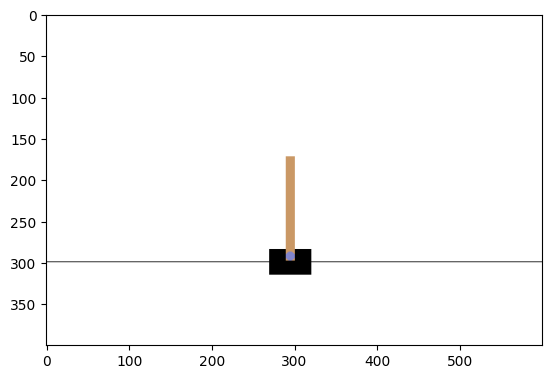

In [ ]:
frames = []
env.close()  # Close the previous env
env = gym.make('CartPole-v1')  # Re-make the environment

state = discretize_state(env.reset(), state_space)
state = np.prod(state)
img = plt.imshow(env.render(mode='rgb_array')) # only call this once, only for the first frame
done = False
while not done:
    frame = env.render(mode='rgb_array')
    frames.append(frame)
    action = agent.choose_action(state)
    next_state, reward, done, info = env.step(action)
    state = discretize_state(next_state, state_space)
    state = np.prod(state)

env.close()

# Save frames as video
imageio.mimsave('cartpole-v1.gif', frames, 'GIF', fps=30)
